In [1]:
import Network
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('./iris.data', header=None)
print(df.head(5))

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [3]:
from sklearn.preprocessing import MinMaxScaler

# minmax = MinMaxScaler()

X = df.values[:, :-1]
# X = minmax.fit_transform(X)

labels = np.unique(df[4])
y = df[4].apply(lambda label: [int(x) for x in label == labels])
print(y.shape)
print(X.shape)

(150,)
(150, 4)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

data_train = list(zip(X, y))

In [5]:
network = Network.Network([4, 6, 3])
network.SGD(data_train, 30, eta=0.01)

n = len(X_test)
acc = network.evaluate(X_test, y_test) / n

while acc < 0.63:
    print(acc)
    del network
    network = Network.Network([4, np.random.randint(2,10), 3])
    network.SGD(data_train, 30, eta=0.01)
    acc = network.evaluate(X_test, y_test) / n

print(acc)

0.26666666666666666
0.26666666666666666
0.36666666666666664
0.23333333333333334
0.26666666666666666
0.36666666666666664
0.26666666666666666
0.26666666666666666
0.36666666666666664
0.36666666666666664
0.26666666666666666
0.26666666666666666
0.36666666666666664
0.36666666666666664
0.36666666666666664
0.36666666666666664
0.26666666666666666
0.36666666666666664
0.36666666666666664
0.6333333333333333


In [6]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5, shuffle=True)
accuracys_1 = []
accuracys_2 = []
model = {
    'network': None,
    'acc': 0
}
for train, test in k_fold.split(X):
    n = len(test)

    network_tmp = Network.Network([4, np.random.randint(2, 20), 3])
    network_tmp.SGD(list(zip(X[train], y[train])), 30, eta=0.01)
    accuracys_1.append( network_tmp.evaluate(X[test], y[test]) / n)
    if (accuracys_1[-1] > model['acc']):
        model['network'] = network_tmp
        model['acc'] = accuracys_1[-1]
    
    network_tmp = Network.Network([4, np.random.randint(2, 20), np.random.randint(2, 20), 3])
    network_tmp.SGD(list(zip(X[train], y[train])), 30, eta=0.01)
    accuracys_2.append( network_tmp.evaluate(X[test], y[test]) / n )
    if (accuracys_2[-1] > model['acc']):
        model['network'] = network_tmp
        model['acc'] = accuracys_2[-1]

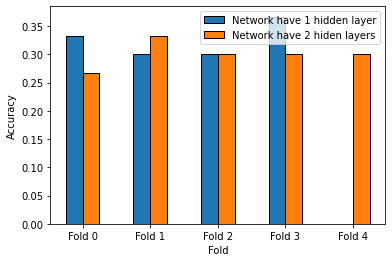

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

x_vals = [i for i in range(5)]
bar_width = 0.25

plt.bar([x_val - bar_width/2 for x_val in x_vals], accuracys_1, width=bar_width, edgecolor='black', linewidth=1, label="Network have 1 hidden layer")
plt.bar([x_val + bar_width/2 for x_val in x_vals], accuracys_2, width=bar_width, edgecolor='black', linewidth=1, label="Network have 2 hiden layers")

# Set ticks, ticks label
plt.xticks(x_vals, [f'Fold {i}' for i in x_vals])

plt.xlabel("Fold")
plt.ylabel("Accuracy")

plt.legend()

plt.show()